In [2]:
import main
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

np.set_printoptions(suppress=False)
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import scipy

In [3]:
def public_goods_fitness_function(state, alpha, r, omega):
    number_of_contributors = state.sum()
    big_bit = r * alpha * (number_of_contributors) / (len(state))
    payoff = np.array([big_bit - alpha * x for x in state])
    return (1) + (omega * payoff)

In [9]:
state_space = main.get_state_space(N=4, k=2)
r_values = np.linspace(1, 4, 2000)
alpha_values = np.linspace(0.5, 6, 2000)
one_coop_values = np.zeros(2000)
two_coop_values = np.zeros(2000)
three_coop_values = np.zeros(2000)

In [ ]:
k = 0
for r in r_values:

    transition_matrix = main.generate_transition_matrix(
        state_space=state_space,
        fitness_function=public_goods_fitness_function,
        r=r,
        alpha=2,
        omega=0.2,
    )

    probability_space = main.get_absorption_probabilities(
        transition_matrix=transition_matrix,
        state_space=state_space,
        exponent_coefficient=50,
    )

    one_coop_values[k] = probability_space[1][3]

    two_coop_values[k] = probability_space[6][3]

    three_coop_values[k] = probability_space[13][3]

    k += 1

print(one_coop_values)
print(two_coop_values)
print(three_coop_values)

[0.17940621 0.17940621 0.17940621 ... 0.17940621 0.17940621 0.17940621]
[0.4010202 0.4010202 0.4010202 ... 0.4010202 0.4010202 0.4010202]
[0.67199943 0.67199943 0.67199943 ... 0.67199943 0.67199943 0.67199943]


<function matplotlib.pyplot.show(close=None, block=None)>

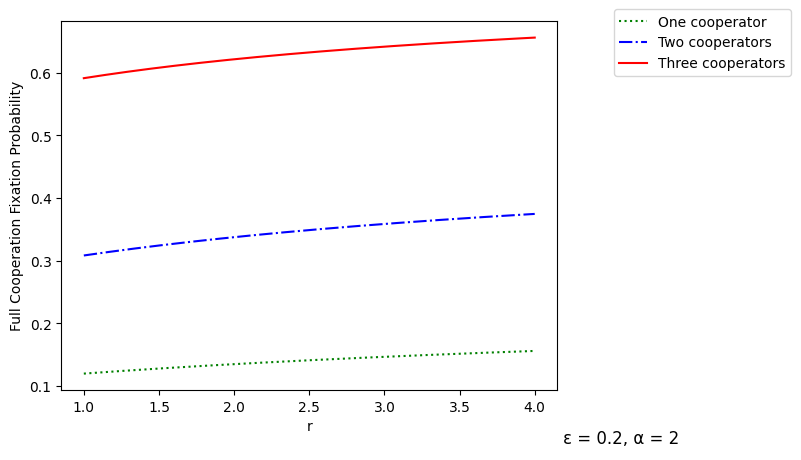

In [85]:
plt.plot(
    r_values, one_coop_values, color="green", label="One cooperator", linestyle=":"
)

plt.plot(
    r_values, two_coop_values, color="blue", label="Two cooperators", linestyle="-."
)

plt.plot(
    r_values,
    three_coop_values,
    color="red",
    label="Three cooperators",
    linestyle="solid",
)

plt.xlabel("r")
plt.ylabel("Full Cooperation Fixation Probability")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.figtext(
    1, 0, "ε = 0.2, α = 2", wrap=True, horizontalalignment="center", fontsize=12
)
plt.show

In [ ]:
public_goods_fitness_function(state=np.array([1, 0, 1, 0]), alpha=4, r=2, omega=0.001)

array([1.000e-03, 4.001e+00, 1.000e-03, 4.001e+00])

In [ ]:
k = 0
for alpha in alpha_values:

    transition_matrix = main.generate_transition_matrix(
        state_space=state_space,
        fitness_function=public_goods_fitness_function,
        r=2,
        alpha=alpha,
        omega=0.2,
    )

    probability_space = main.get_absorption_probabilities(
        transition_matrix=transition_matrix,
        state_space=state_space,
        exponent_coefficient=50,
    )

    one_coop_values[k] = probability_space[1][3]

    two_coop_values[k] = probability_space[6][3]

    three_coop_values[k] = probability_space[13][3]

    k += 1

print(one_coop_values)
print(two_coop_values)
print(three_coop_values)

[0.21445859 0.21427922 0.21409998 ... 0.03431402 0.03427625 0.0342385 ]
[0.45183395 0.45158678 0.45133976 ... 0.17135825 0.17128723 0.17121626]
[0.71329217 0.71310078 0.71290948 ... 0.47272283 0.47265409 0.47258538]


<function matplotlib.pyplot.show(close=None, block=None)>

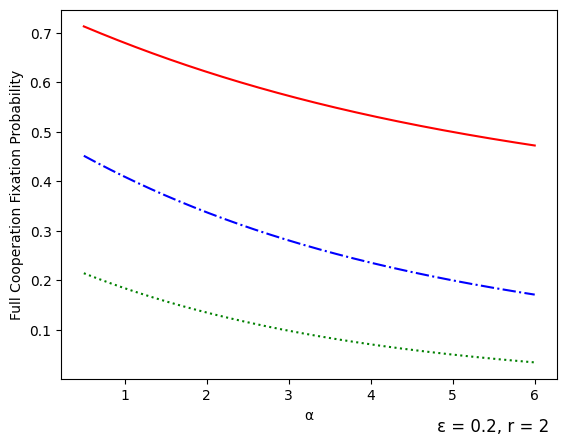

In [87]:
plt.plot(
    alpha_values, one_coop_values, color="green", label="One cooperator", linestyle=":"
)

plt.plot(
    alpha_values, two_coop_values, color="blue", label="Two cooperators", linestyle="-."
)

plt.plot(
    alpha_values,
    three_coop_values,
    color="red",
    label="Three cooperators",
    linestyle="solid",
)

plt.xlabel("α")
plt.ylabel("Full Cooperation Fixation Probability")
plt.figtext(
    0.8, 0, "ε = 0.2, r = 2", wrap=True, horizontalalignment="center", fontsize=12
)
plt.show

In [ ]:
k = 0
quarter_coop_values_ceil = np.zeros(10)
half_coop_values_ceil = np.zeros(10)
three_quarter_coop_values_ceil = np.zeros(10)
quarter_coop_values_floor = np.zeros(10)
half_coop_values_floor = np.zeros(10)
three_quarter_coop_values_floor = np.zeros(10)
N_values = np.arange(3, 13)
one_coop_values = np.zeros(10)
almost_all_coop_values = np.zeros(10)

for N in N_values:

    state_space = main.get_state_space(N=N, k=2)

    transition_matrix = main.generate_transition_matrix(
        state_space=state_space,
        fitness_function=public_goods_fitness_function,
        r=2,
        alpha=2,
        omega=0.2,
    )

    probability_space = main.get_absorption_probabilities(
        transition_matrix=transition_matrix,
        state_space=state_space,
        exponent_coefficient=50,
    )

    one_coop_index = np.where([np.sum(s) == 1 for s in state_space])[0][0]

    quarter_coop_index_ceil = np.where(
        [np.sum(s) == np.ceil(N / 4) for s in state_space]
    )[0][0]

    half_coop_index_ceil = np.where([np.sum(s) == np.ceil(N / 2) for s in state_space])[
        0
    ][0]

    three_quarter_coop_index_ceil = np.where(
        [np.sum(s) == np.ceil(3 * N / 4) for s in state_space]
    )[0][0]

    almost_all_coop_index = np.where([np.sum(s) == N - 1 for s in state_space])[0][0]

    quarter_coop_index_floor = np.where(
        [np.sum(s) == np.floor(N / 4) for s in state_space]
    )[0][0]

    half_coop_index_floor = np.where(
        [np.sum(s) == np.floor(N / 2) for s in state_space]
    )[0][0]

    three_quarter_coop_index_floor = np.where(
        [np.sum(s) == np.floor(3 * N / 4) for s in state_space]
    )[0][0]

    print(state_space[quarter_coop_index_floor])

    one_coop_values[k] = probability_space[one_coop_index][3]

    quarter_coop_values_ceil[k] = probability_space[quarter_coop_index_ceil][3]

    half_coop_values_ceil[k] = probability_space[half_coop_index_ceil][3]

    three_quarter_coop_values_ceil[k] = probability_space[
        three_quarter_coop_index_ceil
    ][3]

    three_quarter_coop_values_floor[k] = probability_space[
        three_quarter_coop_index_floor
    ][3]

    quarter_coop_values_floor[k] = probability_space[quarter_coop_index_floor][3]

    half_coop_values_floor[k] = probability_space[half_coop_index_floor][3]

    three_quarter_coop_values_floor[k] = probability_space[
        three_quarter_coop_index_floor
    ][3]

    almost_all_coop_values[k] = probability_space[almost_all_coop_index][3]

    k += 1


print(quarter_coop_values_ceil)
print(half_coop_values_ceil)
print(three_quarter_coop_values_ceil)

print(quarter_coop_values_floor)
print(half_coop_values_floor)
print(three_quarter_coop_values_floor)

[0 0 0]
[0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 0 1]
[0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 0 0 1 1]
[0 0 0 0 0 0 0 0 0 1 1 1]
[0.22527949 0.13492318 0.21288053 0.1327289  0.07934879 0.04483527
 0.0529532  0.02814095 0.01410056 0.00665051]
[0.55453525 0.33751358 0.39977149 0.25606947 0.27784121 0.17175562
 0.17734025 0.10444849 0.10489525 0.05864388]
[1.         0.62134606 0.65747644 0.67566609 0.68353046 0.45416456
 0.45499113 0.45265429 0.44826755 0.28264891]
[0.         0.13492318 0.08368281 0.05080722 0.02916807 0.04483527
 0.02379758 0.0118347  0.00550809 0.00665051]
[0.22527949 0.33751358 0.21288053 0.25606947 0.1588861  0.17175562
 0.10143221 0.10444849 0.05856411 0.05864388]
[0.55453525 0.62134606 0.39977149 0.43261967 0.44810909 0.45416456
 0.29094217 0.29034687 0.28730197 0.28264891]


<function matplotlib.pyplot.show(close=None, block=None)>

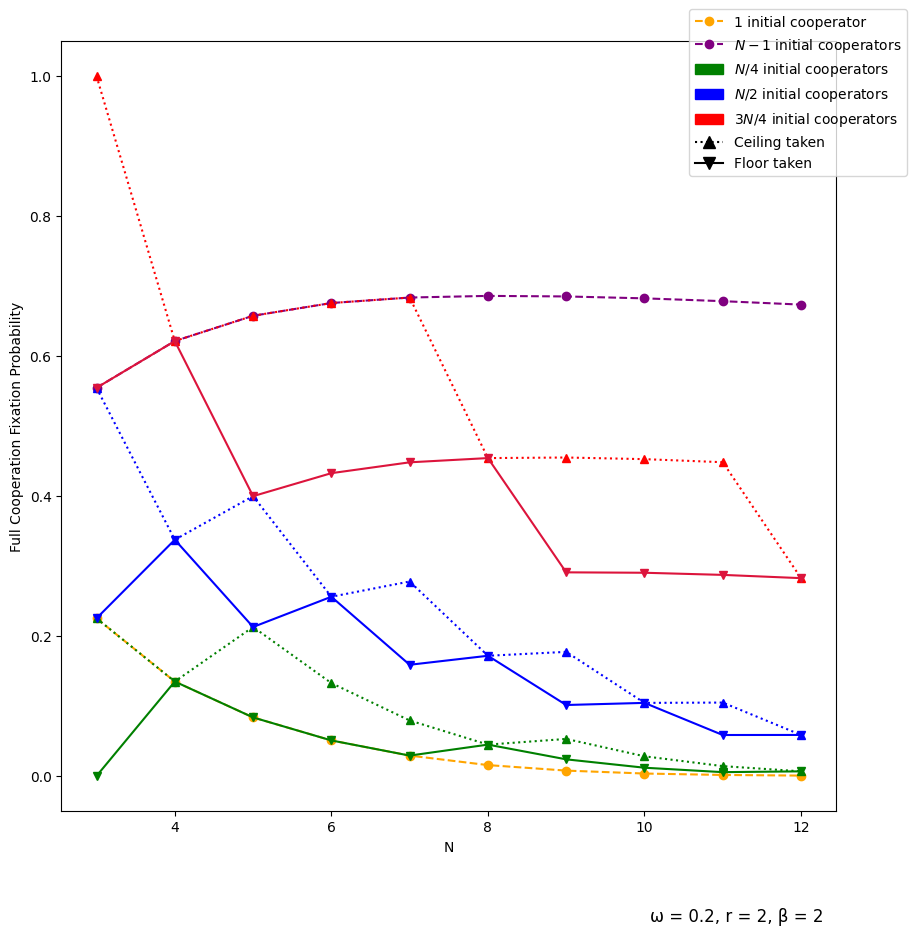

In [76]:
plt.figure(figsize=(10, 10))

plt.plot(
    N_values,
    one_coop_values,
    color="orange",
    linestyle="--",
    marker="o",
    label="1 initial cooperator",
)

plt.plot(
    N_values,
    almost_all_coop_values,
    color="purple",
    linestyle="--",
    marker="o",
    label="$N-1$ initial cooperators",
)
# plt.scatter(N_values, one_coop_values, color = 'orange', label = 'one cooperator', marker = 'o')

plt.plot(N_values, quarter_coop_values_ceil, color="green", linestyle=":", marker="^")
# plt.scatter(N_values, quarter_coop_values_ceil, color = 'green',  marker = '^')

plt.plot(N_values, half_coop_values_ceil, color="blue", linestyle=":", marker="^")
# plt.scatter(N_values, half_coop_values_ceil, color = 'blue', marker = '^')

plt.plot(
    N_values, three_quarter_coop_values_ceil, color="red", linestyle=":", marker="^"
)
# plt.scatter(N_values, three_quarter_coop_values_ceil, color = 'red', marker = '^')

plt.plot(
    N_values, quarter_coop_values_floor, color="green", linestyle="solid", marker="v"
)
# plt.scatter(N_values, quarter_coop_values_floor, color = 'green', marker = 'v')

plt.plot(N_values, half_coop_values_floor, color="blue", linestyle="solid", marker="v")
# plt.scatter(N_values, half_coop_values_floor, color = 'blue', marker = 'v')

plt.plot(
    N_values,
    three_quarter_coop_values_floor,
    color="crimson",
    linestyle="solid",
    marker="v",
)
# plt.scatter(N_values, three_quarter_coop_values_floor, color = 'crimson', marker = 'v')


# plt.scatter(N_values, almost_all_coop_values, color = 'purple', marker = 'o', label = '$N-1$ initial cooperators')

green_patch = mpatches.Patch(color="green", label="$N/4$ initial cooperators")
blue_patch = mpatches.Patch(color="blue", label="$N/2$ initial cooperators")
red_patch = mpatches.Patch(color="red", label="$3N/4$ initial cooperators")

black_ceil = mlines.Line2D(
    [],
    [],
    color="black",
    marker="^",
    linestyle=":",
    markersize=8,
    label="Ceiling taken",
)

black_v = mlines.Line2D(
    [],
    [],
    color="black",
    marker="v",
    linestyle="solid",
    markersize=8,
    label="Floor taken",
)


handles, labels = plt.gca().get_legend_handles_labels()

handles.extend([green_patch, blue_patch, red_patch, black_ceil, black_v])
labels.extend(
    [
        "$N/4$ initial cooperators",
        "$N/2$ initial cooperators",
        "$3N/4$ initial cooperators",
        "Ceiling taken",
        "Floor taken",
    ]
)


plt.xlabel("N")
plt.ylabel("Full Cooperation Fixation Probability")
plt.figtext(
    0.8,
    0,
    "ω = 0.2, r = 2, β = 2",
    wrap=True,
    horizontalalignment="center",
    fontsize=12,
)
plt.legend(handles, labels, bbox_to_anchor=(1.1, 1.05))
plt.show

In [5]:
state_space = main.get_state_space(N=3, k=2)
state_space

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [6]:
r = sym.Symbol("r")
alpha = sym.Symbol("α")
omega = sym.Symbol("ω")
transition_matrix = main.generate_transition_matrix(
    state_space=state_space,
    fitness_function=public_goods_fitness_function,
    r=r,
    alpha=alpha,
    omega=omega,
)
sym.Matrix(transition_matrix)

Matrix([
[                                            1.0,                                                                                                          0.0,                                                                                                          0.0,                                                                                                                  0.0,                                                                                                          0.0,                                                                                                                  0.0,                                                                                                                  0.0,                                                       0.0],
[(2*r*α*ω/3 + 2)/(2*r*α*ω + 3*ω*(r*α/3 - α) + 9), -2*(ω*(r*α/3 - α) + 1)/(2*r*α*ω + 3*ω*(r*α/3 - α) + 9) - (2*r*α*ω/3 + 2)/(2*r*α*ω + 3*ω*(r*α/3 - α) + 9) + 1,                                      

In [7]:
probability_matrix = main.generate_absorption_matrix(transition_matrix, symbolic=True)
B = sym.Matrix(probability_matrix)
B

Matrix([
[2*(2*r*α*ω/3 + 2)*(8*r**4*α**4*ω**4 - 38*r**3*α**4*ω**4 + 72*r**3*α**3*ω**3 + 48*r**2*α**4*ω**4 - 237*r**2*α**3*ω**3 + 234*r**2*α**2*ω**2 - 18*r*α**4*ω**4 + 180*r*α**3*ω**3 - 468*r*α**2*ω**2 + 324*r*α*ω - 27*α**3*ω**3 + 162*α**2*ω**2 - 297*α*ω + 162)/((2*r*α*ω + 3*ω*(r*α/3 - α) + 9)*(40*r**4*α**4*ω**4 - 168*r**3*α**4*ω**4 + 360*r**3*α**3*ω**3 + 284*r**2*α**4*ω**4 - 1116*r**2*α**3*ω**3 + 1170*r**2*α**2*ω**2 - 228*r*α**4*ω**4 + 1242*r*α**3*ω**3 - 2376*r*α**2*ω**2 + 1620*r*α*ω + 72*α**4*ω**4 - 486*α**3*ω**3 + 1296*α**2*ω**2 - 1620*α*ω + 810)) + (2*r*α*ω/3 + 2)*(104*r**4*α**4*ω**4 - 398*r**3*α**4*ω**4 + 936*r**3*α**3*ω**3 + 600*r**2*α**4*ω**4 - 2649*r**2*α**3*ω**3 + 3042*r**2*α**2*ω**2 - 414*r*α**4*ω**4 + 2628*r*α**3*ω**3 - 5652*r*α**2*ω**2 + 4212*r*α*ω + 108*α**4*ω**4 - 891*α**3*ω**3 + 2754*α**2*ω**2 - 3861*α*ω + 2106)/((2*r*α*ω + 3*ω*(r*α/3 - α) + 9)*(40*r**4*α**4*ω**4 - 168*r**3*α**4*ω**4 + 360*r**3*α**3*ω**3 + 284*r**2*α**4*ω**4 - 1116*r**2*α**3*ω**3 + 1170*r**2*α**2*ω**2 - 2

In [8]:
expression1 = sym.lambdify(
    (r, alpha, omega), sym.Matrix(probability_matrix)[0, 1], "numpy"
)

expression2 = sym.lambdify(
    (r, alpha, omega), sym.Matrix(probability_matrix)[0, 0], "numpy"
)

expression6 = sym.lambdify(
    (r, alpha, omega), sym.Matrix(probability_matrix)[5, 1], "numpy"
)

In [9]:
rho_001 = sym.simplify(sym.Matrix(probability_matrix)[0, 1])
rho_001

(2*r**2*α**2*ω**2 - 9*r*α**2*ω**2 + 9*r*α*ω + 9*α**2*ω**2 - 18*α*ω + 9)/(3*(2*r**2*α**2*ω**2 - 4*r*α**2*ω**2 + 9*r*α*ω + 3*α**2*ω**2 - 9*α*ω + 9))

In [34]:
Numerator = (
    (2 * 16 * 4 * 0.2 * 0.2)
    - (9 * 4 * 4 * 0.04)
    + (9 * 4 * 2 * 0.2)
    + (9 * 4 * 0.04)
    - (18 * 2 * 0.2)
    + 9
)

Denominator = 3 * (
    (2 * 16 * 4 * 0.04)
    - 4 * (4 * 4 * 0.04)
    + (9 * 4 * 2 * 0.2)
    + (3 * 4 * 0.04)
    - (9 * 2 * 0.2)
    + 9
)

Numerator / Denominator

0.24810274372445998

In [10]:
sym.simplify(sym.diff(rho_001, alpha))

ω*((4*r**2*α*ω - 18*r*α*ω + 9*r + 18*α*ω - 18)*(2*r**2*α**2*ω**2 - 4*r*α**2*ω**2 + 9*r*α*ω + 3*α**2*ω**2 - 9*α*ω + 9) - (4*r**2*α*ω - 8*r*α*ω + 9*r + 6*α*ω - 9)*(2*r**2*α**2*ω**2 - 9*r*α**2*ω**2 + 9*r*α*ω + 9*α**2*ω**2 - 18*α*ω + 9))/(3*(2*r**2*α**2*ω**2 - 4*r*α**2*ω**2 + 9*r*α*ω + 3*α**2*ω**2 - 9*α*ω + 9)**2)

In [11]:
expression1(2, 2, 0.2)

0.22528032619775737

In [67]:
r_values = np.linspace(0, 4, 500)
alpha_values = np.linspace(0, 4, 500)
K, T = np.meshgrid(r_values, alpha_values)
Z_one = expression1(K, T, 0.2)
Z_one
Z_six = expression6(K, T, 0.2)

In [ ]:
print(np.where(Z_one > 1))
print(np.where(Z_one < 0))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


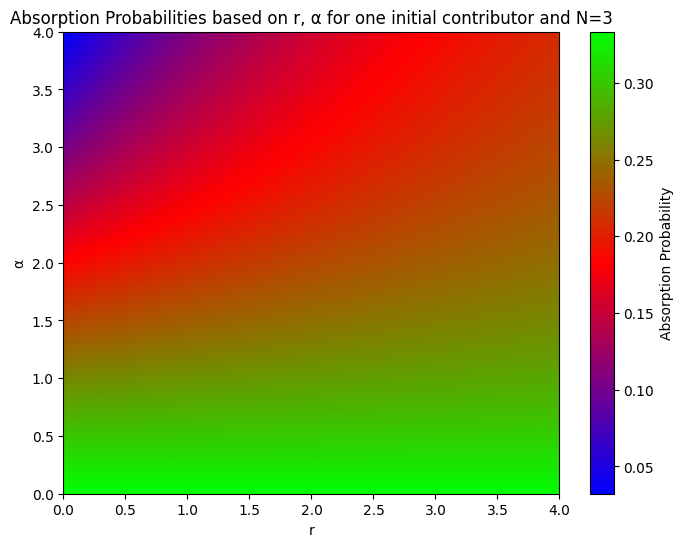

In [ ]:
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(
    Z_one,
    extent=[r_values.min(), r_values.max(), alpha_values.min(), alpha_values.max()],
    origin="lower",
    aspect="auto",
    cmap="brg",
)

plt.colorbar(heatmap, label="Absorption Probability")
plt.xlabel("r")
plt.ylabel("α")
plt.title("Absorption Probabilities based on r, α for one initial contributor and N=3")
plt.show()

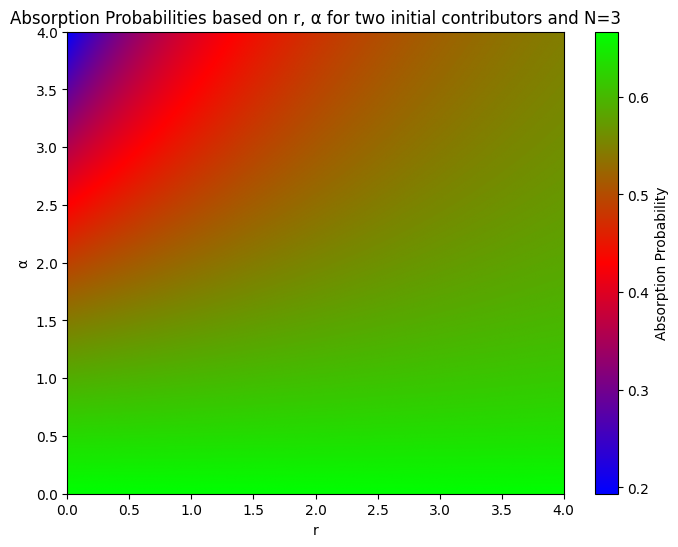

In [68]:
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(
    Z_six,
    extent=[r_values.min(), r_values.max(), alpha_values.min(), alpha_values.max()],
    origin="lower",
    aspect="auto",
    cmap="brg",
)

plt.colorbar(heatmap, label="Absorption Probability")
plt.xlabel("r")
plt.ylabel("α")
plt.title("Absorption Probabilities based on r, α for two initial contributors and N=3")
plt.show()

In [24]:
testZ = expression2(K, T, 0.2)

np.where(~np.isclose(Z + testZ, 1))

(array([], dtype=int64), array([], dtype=int64))

In [1]:
def value_finder(r, alpha, state_space, fitness_function):

    transition_matrix = main.generate_transition_matrix(
        state_space, fitness_function, r=r, alpha=alpha, omega=0.2
    )

    absorption_matrix = main.generate_absorption_matrix(transition_matrix)

    return absorption_matrix[0, 1]

In [ ]:
r_values = np.linspace(0.1, 4, 500)
alpha_values = np.linspace(0.1, 10, 500)
K, T = np.meshgrid(r_values, alpha_values)
Z = np.zeros((500, 500))
for x in range(499):
    for y in range(499):
        print(x, y)
        Z[x, y] = value_finder(
            r_values[x], alpha_values[y], state_space, public_goods_fitness_function
        )
print(Z)

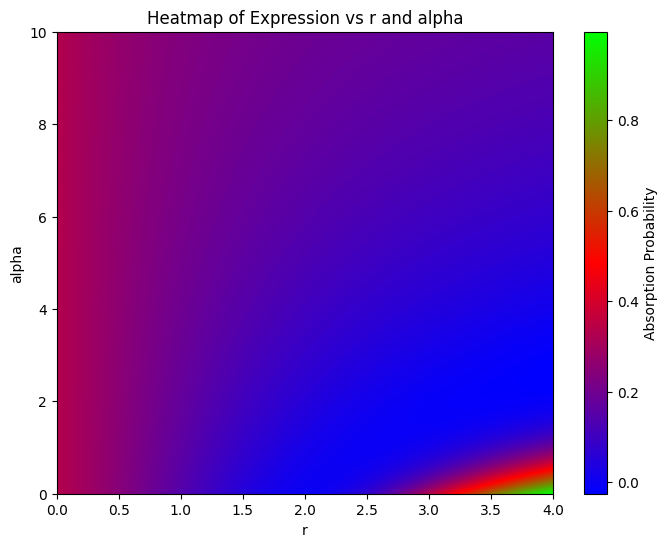

In [24]:
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(
    Z,
    extent=[r_values.min(), r_values.max(), alpha_values.min(), alpha_values.max()],
    origin="lower",
    aspect="auto",
    cmap="brg",
)

plt.colorbar(heatmap, label="Absorption Probability")
plt.xlabel("r")
plt.ylabel("alpha")
plt.title("Heatmap of Expression vs r and alpha")
plt.show()

In [74]:
r_values = np.linspace(0, 4, 500)
alpha_values = np.linspace(0, 4, 500)
Z_numeric = np.zeros((500, 500))
for x in range(500):
    for y in range(500):

        transition_matrix = main.generate_transition_matrix(
            state_space=state_space,
            fitness_function=public_goods_fitness_function,
            r=r_values[x],
            alpha=alpha_values[y],
            omega=0.2,
        )

        probability_space = main.get_absorption_probabilities(
            transition_matrix=transition_matrix,
            state_space=state_space,
            exponent_coefficient=50,
        )

        print(x, y)

        Z_numeric[y, x] = probability_space[1][3]


print(Z_numeric)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


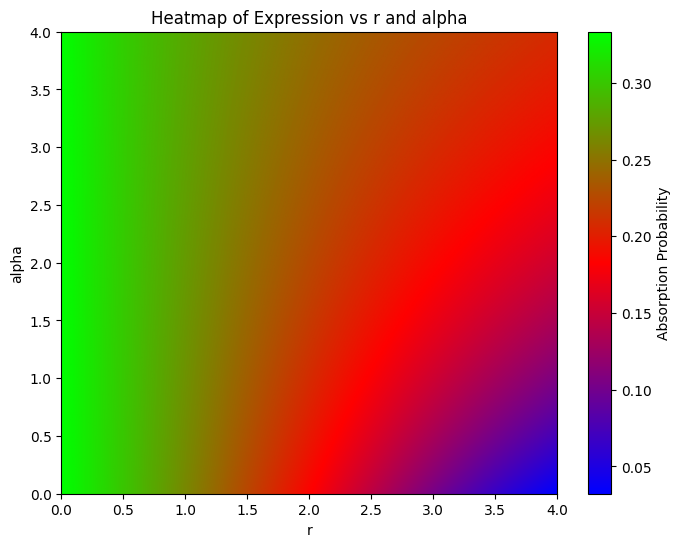

In [73]:
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(
    Z_numeric,
    extent=[r_values.min(), r_values.max(), alpha_values.min(), alpha_values.max()],
    origin="lower",
    aspect="auto",
    cmap="brg",
)

plt.colorbar(heatmap, label="Absorption Probability")
plt.xlabel("r")
plt.ylabel("alpha")
plt.title("Heatmap of Expression vs r and alpha")
plt.show()

In [62]:
np.round(np.abs(Z - np.transpose(Z_numeric)), decimals=5)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(500, 500))

In [16]:
rho_001

(2*r**2*α**2*ω**2 - 9*r*α**2*ω**2 + 9*r*α*ω + 9*α**2*ω**2 - 18*α*ω + 9)/(3*(2*r**2*α**2*ω**2 - 4*r*α**2*ω**2 + 9*r*α*ω + 3*α**2*ω**2 - 9*α*ω + 9))

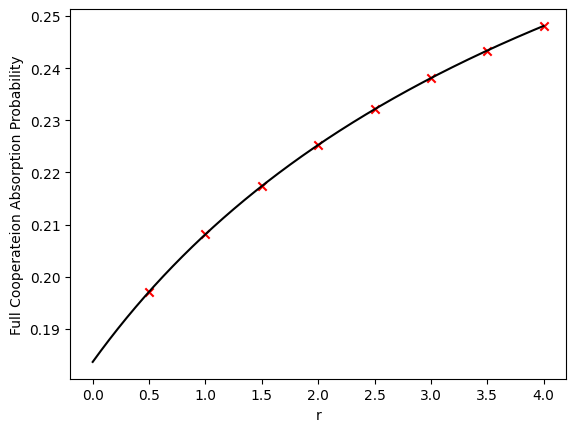

In [ ]:
r_values = np.linspace(0, 4, 2000)
Z = expression1(r_values, 2, 0.2)

r_test_values = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

examples = [
    0.1971326164874552,
    0.20815138282387194,
    0.21739130434782605,
    0.22528032619775737,
    0.23211169284467714,
    0.2380952380952381,
    0.24338624338624337,
    0.24810274372445998,
]

plt.plot(r_values, Z, color="black", linestyle="solid")
plt.scatter(r_test_values, examples, color="red", marker="x")
plt.xlabel("r")
plt.ylabel("Full Cooperateion Absorption Probability")
plt.show()

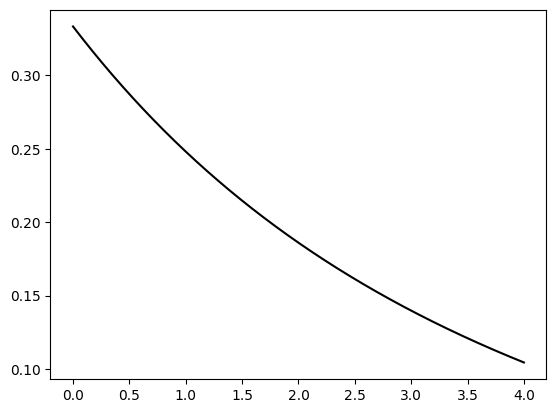

In [23]:
alpha_values = np.linspace(0, 6, 2000)
Z = expression1(2, alpha_values, 0.2)

plt.plot(r_values, Z, color="black", linestyle="solid")
plt.show()